<a href="https://colab.research.google.com/github/wirlsawyer/Colaboratory/blob/master/sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  869k  100  869k    0     0  4113k      0 --:--:-- --:--:-- --:--:-- 4121k


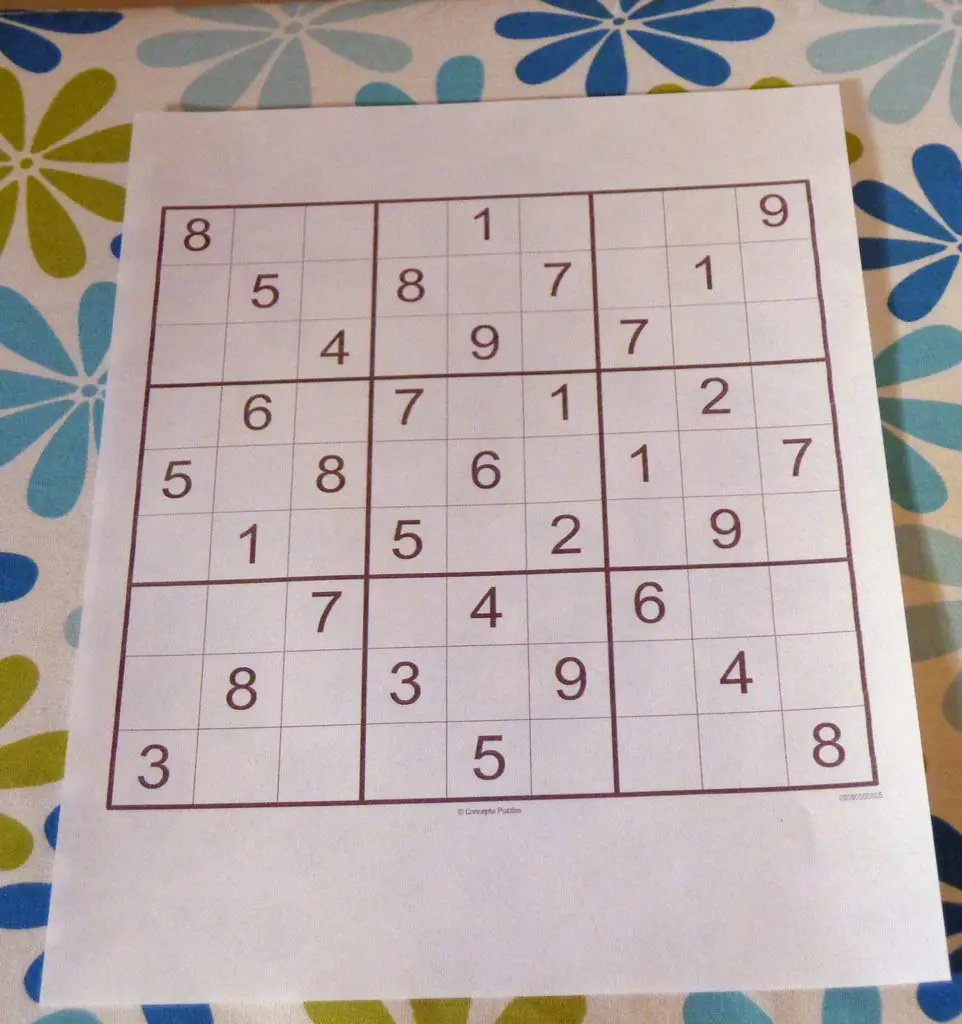

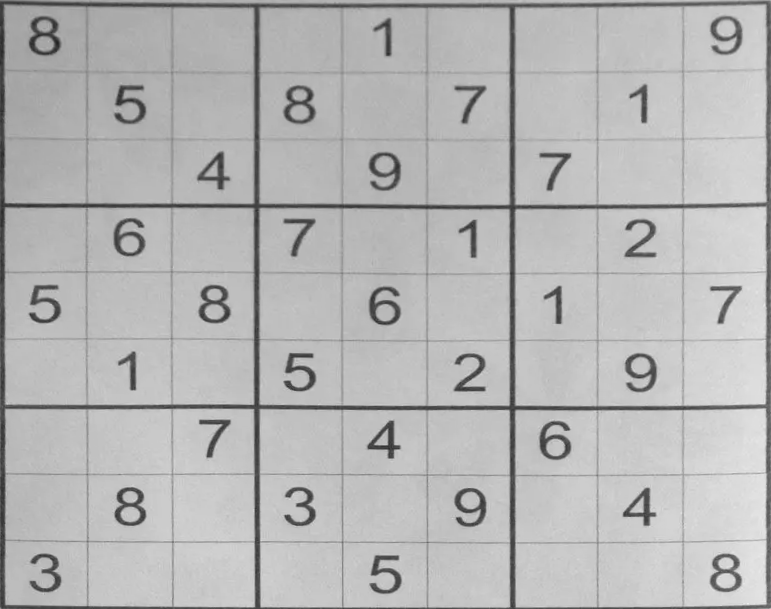

In [13]:
from imutils.perspective import four_point_transform
from skimage.segmentation import clear_border
import numpy as np
import imutils
import cv2
from google.colab.patches import cv2_imshow

def find_puzzle(image, debug=False):
    kernel_size = 5
    # convert the image to grayscale and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 3)

    # apply adaptive thresholding and then invert the threshold map
    thresh = cv2.adaptiveThreshold(blurred, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    thresh = cv2.bitwise_not(thresh)
    # check to see if we are visualizing each step of the image
    # processing pipeline (in this case, thresholding)
    if debug:
        cv2.imshow("Puzzle Thresh", thresh)
        cv2.waitKey(0)


    # find contours in the thresholded image and sort them by size in
    # descending order
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    # initialize a contour that corresponds to the puzzle outline
    puzzleCnt = None
    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        # if our approximated contour has four points, then we can
        # assume we have found the outline of the puzzle
        if len(approx) == 4:
            puzzleCnt = approx
            break

    # if the puzzle contour is empty then our script could not find
    # the outline of the Sudoku puzzle so raise an error
    if puzzleCnt is None:
        raise Exception(("Could not find Sudoku puzzle outline. "
            "Try debugging your thresholding and contour steps."))
    # check to see if we are visualizing the outline of the detected
    # Sudoku puzzle
    if debug:
        # draw the contour of the puzzle on the image and then display
        # it to our screen for visualization/debugging purposes
        output = image.copy()
        cv2.drawContours(output, [puzzleCnt], -1, (0, 255, 0), 2)
        cv2.imshow("Puzzle Outline", output)
        cv2.waitKey(0)

    # apply a four point perspective transform to both the original
    # image and grayscale image to obtain a top-down bird's eye view
    # of the puzzle
    puzzle = four_point_transform(image, puzzleCnt.reshape(4, 2))
    warped = four_point_transform(gray, puzzleCnt.reshape(4, 2))
    # check to see if we are visualizing the perspective transform
    if debug:
        # show the output warped image (again, for debugging purposes)
        cv2.imshow("Puzzle Transform", puzzle)
        cv2.waitKey(0)
    # return a 2-tuple of puzzle in both RGB and grayscale
    return (puzzle, warped)


def find_cell(image, debug=False):
    kernel_size = 7
    imgContour = image.copy()
    imgGray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  #轉灰度圖
    imgBlur = cv2.GaussianBlur(imgGray, (kernel_size, kernel_size), 0)  #高斯模糊 cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)
    imgCanny = cv2.Canny(imgBlur, 60, 90)  #Canny算子邊緣檢測 cv2.Canny(blur_gray, low_threshold, high_threshold) John Canny原演算法提出者建議低到高比率為1：2或1：3。

    contours, hierarchy = cv2.findContours(imgCanny, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)  #尋找輪廓點
    for obj in contours:
        area = cv2.contourArea(obj)  #計算輪廓內區域的面積
        perimeter = cv2.arcLength(obj, True)  #計算輪廓周長
        approx = cv2.approxPolyDP(obj, 0.02 * perimeter, True)  #獲取輪廓角點坐標

        CornerNum = len(approx)   #輪廓角點的數量
        x, y, w, h = cv2.boundingRect(approx)  #獲取坐標值和寬度、高度
        if CornerNum == 4:
            cv2.drawContours(imgContour, obj, -1, (0, 255, 0), 4)  #繪制輪廓線

        continue

    # check to see if we are visualizing each step of the image
    # processing pipeline (in this case, thresholding)
    if debug:
        cv2.imshow("Img Contour", imgContour)
        cv2.waitKey(0)


def thresh(image, debug=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (7, 7), 3)

    # apply adaptive thresholding and then invert the threshold map
    thresh = cv2.adaptiveThreshold(blurred, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    thresh = cv2.bitwise_not(thresh)
    # check to see if we are visualizing each step of the image
    # processing pipeline (in this case, thresholding)
    if debug:
        # cv2.imshow("Puzzle Thresh", gray)
        # cv2.waitKey(0)
        cv2_imshow(gray)

!curl -o img0.jpg https://raw.githubusercontent.com/wirlsawyer/Colaboratory/master/E.jpg
img = cv2.imread('img0.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

# path = './E.jpg'
# img = cv2.imread(path)
# cv2.imshow('img', img)

puzzle, warped = find_puzzle(img, False)
thresh(puzzle, True)